## In this Notebook we are analyzing about Most subcribed youtube channels

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv('/kaggle/input/most-subscribed-youtube-channel/Most Subscribed YouTube Channels_exported.csv')
data.head()

,Name,Brand channel,Subscribers (millions),Primary language,Category,Country
0,T-Series,Yes,249.0,Hindi[7][8],Music,India
1,MrBeast,No,184.0,English,Entertainment,United States
2,Cocomelon,Yes,165.0,English,Education,United States
3,Sony Entertainment Television India,Yes,162.0,Hindi[9],Entertainment,India
4,Kids Diana Show,Yes,113.0,English[10][11][12],Entertainment,Ukraine- United States


In [3]:
data.shape

(50, 6)

/tmp/ipykernel_18/3626298187.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Subscribers (millions)'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Subscribers (millions)', ylabel='Density'>

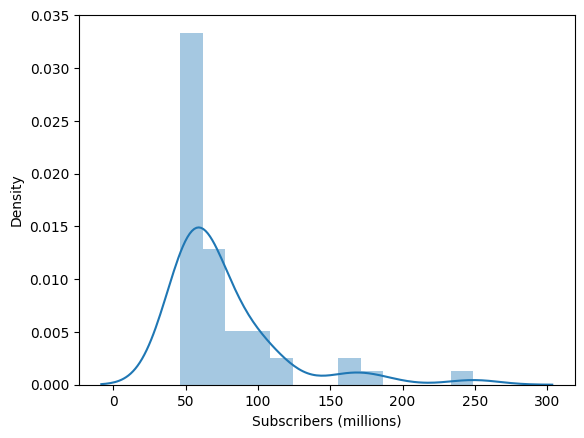

In [4]:
sns.distplot(data['Subscribers (millions)'])

<Axes: xlabel='Name'>

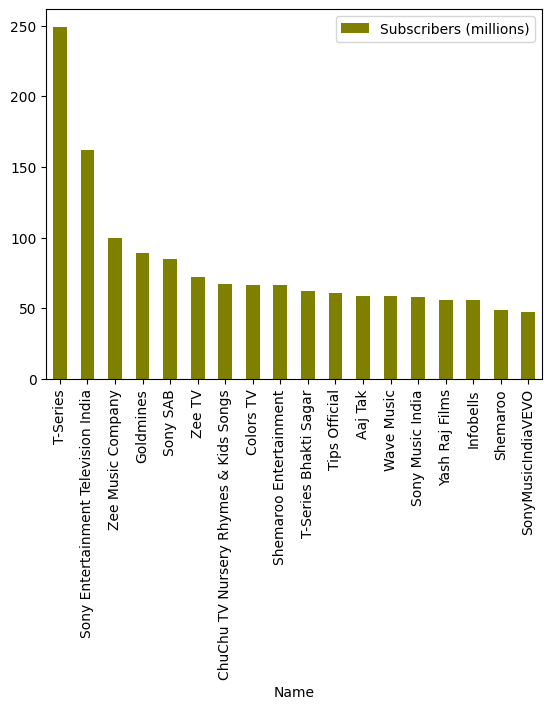

In [5]:
# Indian Channels as their Subscibers in million
ind=data[data['Country'] =='India'].set_index('Name')
ind.plot(kind='bar',color='olive')

<Axes: xlabel='Country'>

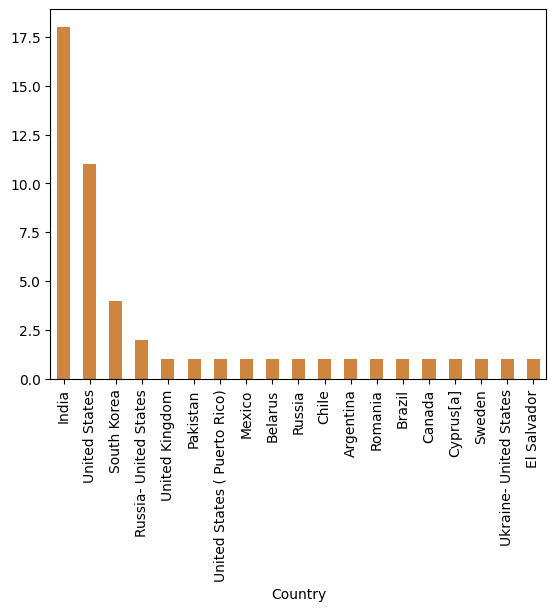

In [6]:
#Countries as per Values or Yotube Channels
data['Country'].value_counts().plot(kind='bar',color='peru')

<Axes: xlabel='Primary language'>

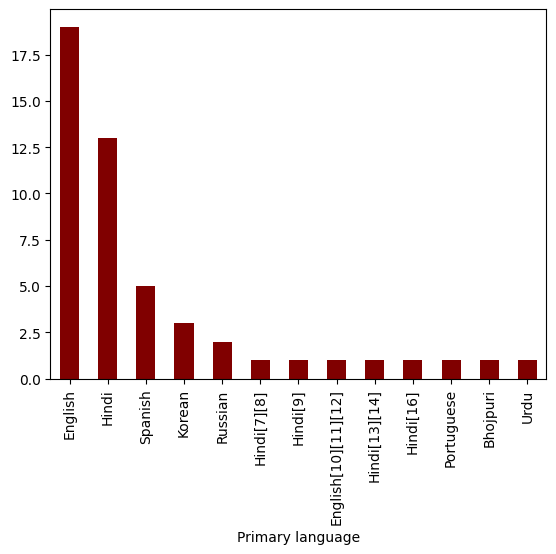

In [7]:
#count of Languages 
data['Primary language'].value_counts().plot(kind='bar',color='maroon')

<Axes: title={'center': ' % Of brand channels'}>

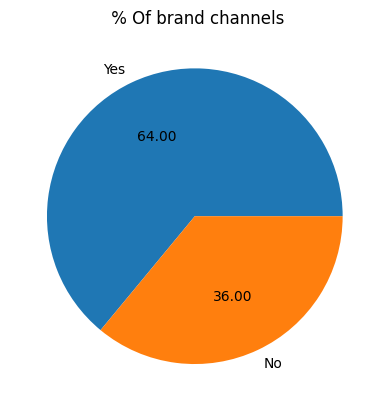

In [8]:
data['Brand channel'].value_counts().plot(kind='pie',autopct='%.2f',ylabel='',title=' % Of brand channels')

as we can see in this dataset 64% Brands and 36% are Not Brand Channels

In [9]:
### Lets do the one hot incoding on the feature BRand  channel
data['Brand channel 01']=pd.get_dummies(data['Brand channel'],drop_first=True,dtype=int)

In [10]:
data.head(2)

,Name,Brand channel,Subscribers (millions),Primary language,Category,Country,Brand channel 01
0,T-Series,Yes,249.0,Hindi[7][8],Music,India,1
1,MrBeast,No,184.0,English,Entertainment,United States,0


In [11]:

data['Category'].value_counts()

Category
Music            22
Entertainment    17
Education         4
Sports            2
Film              2
How-to            1
News              1
Games             1
Name: count, dtype: int64

In [12]:
#label encoding 
data['Category']=data['Category'].replace({'Music':1, 'Entertainment':2, 'Education':3, 'Sports':4, 'Film':5, 'How-to':6,
       'News':7, 'Games':8})
data['Category']

/tmp/ipykernel_18/651420085.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Category']=data['Category'].replace({'Music':1, 'Entertainment':2, 'Education':3, 'Sports':4, 'Film':5, 'How-to':6,


0     1
1     2
2     3
3     2
4     2
5     2
6     2
7     2
8     1
9     4
10    1
11    5
12    2
13    6
14    1
15    1
16    2
17    1
18    3
19    3
20    1
21    2
22    1
23    1
24    2
25    5
26    4
27    1
28    7
29    1
30    1
31    1
32    1
33    1
34    3
35    1
36    1
37    1
38    2
39    1
40    2
41    2
42    1
43    2
44    1
45    2
46    2
47    1
48    2
49    8
Name: Category, dtype: int64

In [13]:
data['Category'].dtype

dtype('int64')

* we can see our Category column is now a numeric 